# Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ! pip install plotly
import plotly.express as px #will be trying this for time series data

#metrics and data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score,classification_report, confusion_matrix ,roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

#classification models i will be using
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

print('Done Loading Libs')

Done Loading Libs


# Load Dataset & EDA

In [2]:
filePath = '/content/drive/MyDrive/Colab_Notebooks/Final_ML/Occupancy_Estimation.csv'
df = pd.read_csv(filePath)

In [3]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
#double check num of rows and columns
df.shape

(10129, 19)

In [ ]:
#check data types
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [ ]:
#check for nulls
df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
#check for any unique values
df.nunique()
#i see that the readings are across one week / 7 days worth of readings

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

# Data Visualization

In [11]:
# here, i chose to see occupancy counts across the 7 days, where i assumed from the 25th-newyears would be christmas holiday aka no check ins
unique_dates = df['Date'].unique()

for date_to_plot in unique_dates:
    df_for_date = df[df['Date'] == date_to_plot]

    fig = px.line(df_for_date, x='Time', y='Room_Occupancy_Count', title=f'Room Occupancy Count on {date_to_plot}')
    fig.show(renderers = ['chrome'])


this raises a question,  can i drop the 4 days that have no employees checking in and only rely on the 3 days that have fluctuations and activity?

In [ ]:
# https://plotly.com/python/
fig = px.histogram(df, x="S1_Light", color="Room_Occupancy_Count", marginal="rug",
                   hover_data=df.columns)
fig.show()

plotting histograms for time series data allows us to see the distribution of room occupancy count accross the sensors, plotly allows an interactive display to see the readings per occupancy count when hovering on the top 'rugs'
(press on the legend to isolate class)

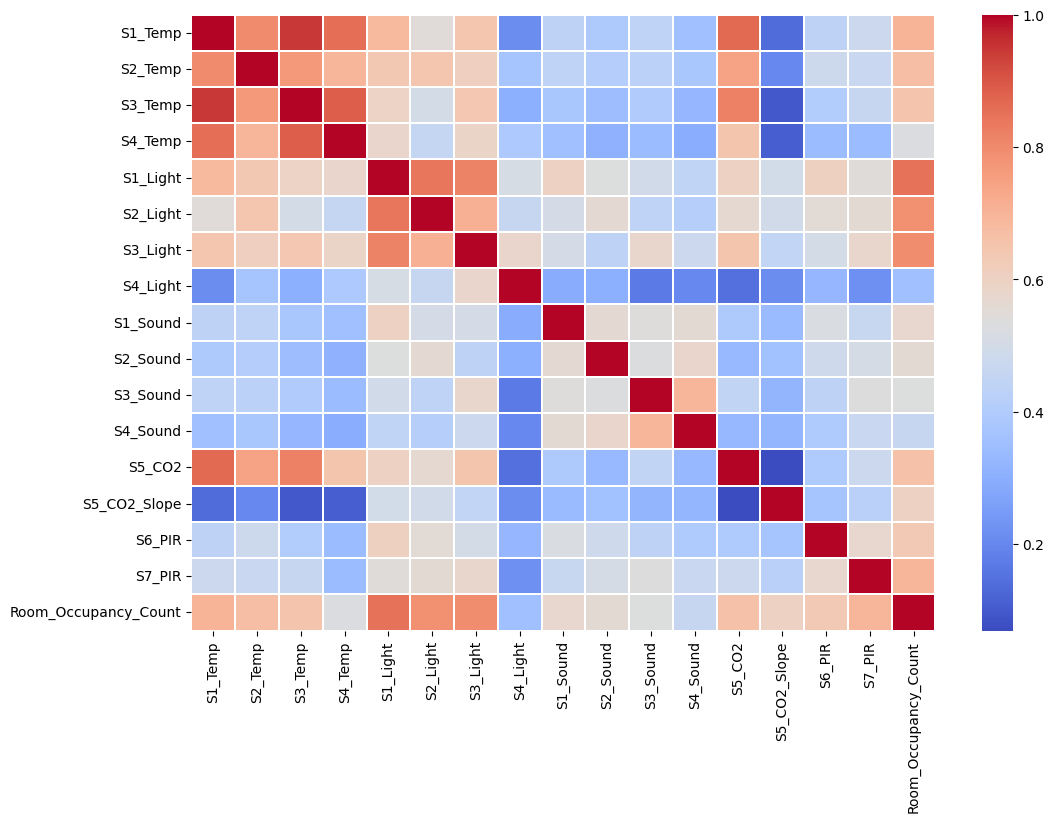

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',  linewidths=0.3);
plt.show();

specifically looking at room occupancy count visually we
can say light sensors have the most effect on room occupancy count (just an assumption)

<ipython-input-12-41c7b35dfd09>:5: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



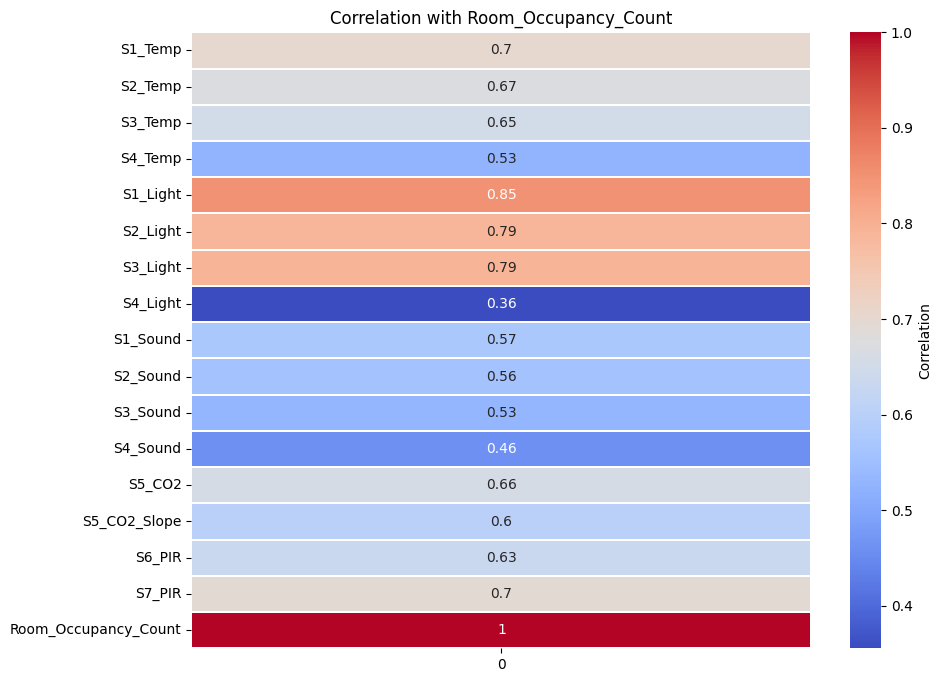

In [ ]:
# a closer look on room occupancy count only
target_column = 'Room_Occupancy_Count'

plt.figure(figsize=(10, 8))
correlation_matrix = df.corrwith(df[target_column])
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, linewidths=0.3, cbar_kws={'label': 'Correlation'})
plt.title(f'Correlation with {target_column}')
plt.show()


### Functions to call for evaluation metrics and plotting instead of plotting by hand each time

In [ ]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred, average='micro'), 3)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy: {:.3f} | F1 Score: {:.3f}'.format(acc, f1), size=10)
    plt.show()

In [ ]:
def metrics(y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy, "||  Rounded: ",round(accuracy, 3))
    f1 = f1_score(y_test, y_pred, average='micro')
    print('F1 Score:', f1, "||    Rounded: ",round(f1, 3))
    recall = recall_score(y_test, y_pred, average='micro')
    print('Recall:', recall, "  ||  Rounded: ",round(recall, 3))
    precision = precision_score(y_test, y_pred, average='micro')
    print('Precision:', precision, "||  Rounded: ", round(precision,3))

# Check Class Balance

In [ ]:
label_counts = df['Room_Occupancy_Count'].value_counts()
fig = px.pie(names=label_counts.index, values=label_counts.values, title='Distribution of Labels', height=500, width=500)
fig.show()
# a clear class imbalance

In [ ]:
# i dropped the date and time columns since they were giving me errors with the grid search
# i could go the extra mile and make them floats but according to the paper, they only used the sensor data as the features

X = df.drop(["Room_Occupancy_Count", "Date", "Time"], axis=1)
y = df['Room_Occupancy_Count']

print(X.shape)
print(y.shape)

(10129, 16)
(10129,)


# Scaling the X features
i chose to set aside the motion senors since their values are already 0-1
in multiclass classification, scaling of the Y features is not necessary

In [ ]:
X_nonbinary = X.copy()
X_nonbinary = X_nonbinary.drop(["S6_PIR", "S7_PIR"], axis=1)
X_nonbinary

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000


In [ ]:
X_binary = X.copy()
X_binary = X[["S6_PIR", "S7_PIR"]]
X_binary

,S6_PIR,S7_PIR
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10124,0,0
10125,0,0
10126,0,0
10127,0,0


In [ ]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_nonbinary)

In [ ]:
X_scaled = np.concatenate((X_scaled1, X_binary), axis=1)

In [ ]:
print(X_scaled)

[[-1.46303347 -1.35777517 -1.16233429 ...  0.66446859  0.
   0.        ]
 [-1.46303347 -1.35777517 -1.16233429 ...  0.558817    0.
   0.        ]
 [-1.29225542 -1.35777517 -1.30276354 ...  0.4498638   0.
   0.        ]
 ...
 [-0.92223631 -0.82903247 -0.85807092 ...  0.00414617  0.
   0.        ]
 [-0.92223631 -0.82903247 -0.85807092 ...  0.00414617  0.
   0.        ]
 [-0.92223631 -0.82903247 -0.85807092 ...  0.00414617  0.
   0.        ]]


# Resampling data
undersampling and oversampling, later a base model will be tested on both to see how performance is affected

## Random UnderSampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_scaled, y)

print(X_under.shape)
print(y_under.shape)

(1836, 16)
(1836,)


In [ ]:
label_counts = y_under.value_counts()
fig = px.pie(names=label_counts.index, values=label_counts.values, title='Distribution of Labels after RUS', height=500, width=500)
fig.show()

In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2 , random_state=42)

In [ ]:
print("X Training undersampled: ", X_train_under.shape)
print("X Testing undersampled: ", X_test_under.shape)
print("y Training undersampled: ",y_train_under.shape)
print("y Testing undersampled: ",y_test_under.shape)

X Training undersampled:  (1468, 16)
X Testing undersampled:  (368, 16)
y Training undersampled:  (1468,)
y Testing undersampled:  (368,)


## Synthetic Oversampling with SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_over, y_over = sm.fit_resample(X_scaled, y)

print(X_over.shape)
print(y_over.shape)

(32912, 16)
(32912,)


In [ ]:
label_counts = y_over.value_counts()
fig = px.pie(names=label_counts.index, values=label_counts.values, title='Distribution of Labels after SMOTE', height=500, width=500)
fig.show()

In [ ]:
# i believe the oversampled data has almost tripled the original data,  a 65-35 split will be my go to
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.35, random_state=42)

In [ ]:
print("X Training Oversampled: ", X_train_over.shape)
print("X Testing Oversampled: ", X_test_over.shape)
print("y Training Oversampled: ",y_train_over.shape)
print("y Testing Oversampled: ",y_test_over.shape)

X Training Oversampled:  (21392, 16)
X Testing Oversampled:  (11520, 16)
y Training Oversampled:  (21392,)
y Testing Oversampled:  (11520,)


What difference in result would it make if i used under sampling or over sampling?

# Try a base model - Decision Tree

### Random under Sampled

In [ ]:
from sklearn.tree import DecisionTreeClassifier
base1 = DecisionTreeClassifier()
base1.fit(X_train_under, y_train_under)

base1_predictions_under = base1.predict(X_test_under)

metrics(y_test_under,base1_predictions_under)

Accuracy: 0.9809782608695652 ||  Rounded:  0.981
F1 Score: 0.9809782608695652 ||    Rounded:  0.981
Recall: 0.9809782608695652   ||  Rounded:  0.981
Precision: 0.9809782608695652 ||  Rounded:  0.981


In [ ]:
print(confusion_matrix(y_test_under,base1_predictions_under))

[[92  0  0  1]
 [ 0 86  2  0]
 [ 0  2 91  2]
 [ 0  0  0 92]]


### SMOTE

In [ ]:
base2 = DecisionTreeClassifier()
base2.fit(X_train_over, y_train_over)

base2_predictions_over = base2.predict(X_test_over)

metrics(y_test_over,base2_predictions_over)

Accuracy: 0.9989583333333333 ||  Rounded:  0.999
F1 Score: 0.9989583333333333 ||    Rounded:  0.999
Recall: 0.9989583333333333   ||  Rounded:  0.999
Precision: 0.9989583333333333 ||  Rounded:  0.999


In [ ]:
print(confusion_matrix(y_test_over,base2_predictions_over))
# # tbh maybe accuracy is higher in oversampled but looking at the confusion matrix its kind
# # of the same just with bigger values, we see some misclassified samples for the class 3

[[2845    0    0    0]
 [   0 2866    2    0]
 [   0    2 2855    4]
 [   0    0    4 2942]]


# SVM Linear Model with GridSearch with cv = Startified K-fold cross-validation





In [ ]:
# first i will try Grid Search with CV = kfold on the undersampled data since instances are lower and i already have access to it

svm_linear_grid = {
    'C' : [0.1,1,10,100] }

n_folds = 10  #10 folds since param grid is small
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

svm_linear = SVC(kernel= 'linear',random_state=42)

svm_grid_search_linear = GridSearchCV(svm_linear, param_grid = svm_linear_grid, cv=kfold, scoring='accuracy')
%time svm_grid_search_linear.fit(X_train_under, y_train_under)

print("\n")
print("Best parameters for SVM Linear with Stratified Kfold Validation:", svm_grid_search_linear.best_params_)

CPU times: user 6.72 s, sys: 0 ns, total: 6.72 s
Wall time: 11.3 s


Best parameters for SVM Linear with Stratified Kfold Validation: {'C': 1}


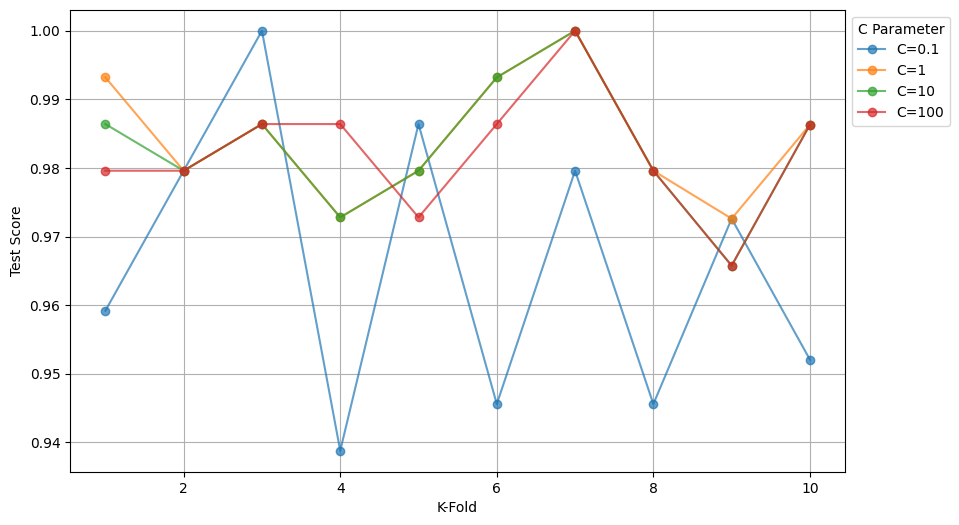

In [ ]:
results = pd.DataFrame(svm_grid_search_linear.cv_results_)

fold_columns = [f'split{i}_test_score' for i in range(10)]
test_scores = results[fold_columns]
param_values = results['param_C']

plt.figure(figsize=(10, 6))
for idx, row in test_scores.iterrows():
    plt.plot(np.arange(1, 11), row, marker='o', label=f'C={param_values[idx]}', alpha=0.7)


plt.xlabel('K-Fold')
plt.ylabel('Test Score')
plt.legend(title='C Parameter', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052455,0.015800,0.005840,0.004059,0.1,{'C': 0.1},0.959184,0.979592,1.000000,0.938776,0.986395,0.945578,0.979592,0.945578,0.972603,0.952055,0.965935,0.019497,4
1,0.051246,0.008345,0.003374,0.002090,1,{'C': 1},0.993197,0.979592,0.986395,0.972789,0.979592,0.993197,1.000000,0.979592,0.972603,0.986301,0.984326,0.008655,1
2,0.126535,0.039123,0.003022,0.001167,10,{'C': 10},0.986395,0.979592,0.986395,0.972789,0.979592,0.993197,1.000000,0.979592,0.965753,0.986301,0.982961,0.009292,2
3,0.878890,0.634476,0.003600,0.003299,100,{'C': 100},0.979592,0.979592,0.986395,0.986395,0.972789,0.986395,1.000000,0.979592,0.965753,0.986301,0.982280,0.008751,3


In [ ]:
# i will train and test on the oversampeled data
svm_linear = SVC(kernel= 'linear', C = 1,random_state=42)
%time svm_linear.fit(X_train_over,y_train_over)

CPU times: user 1.79 s, sys: 63.9 ms, total: 1.86 s
Wall time: 2.86 s


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
predictions_linear = svm_linear.predict(X_test_over)
metrics(y_test_over, predictions_linear)

Accuracy: 0.9896701388888889 ||  Rounded:  0.99
F1 Score: 0.9896701388888889 ||    Rounded:  0.99
Recall: 0.9896701388888889   ||  Rounded:  0.99
Precision: 0.9896701388888889 ||  Rounded:  0.99


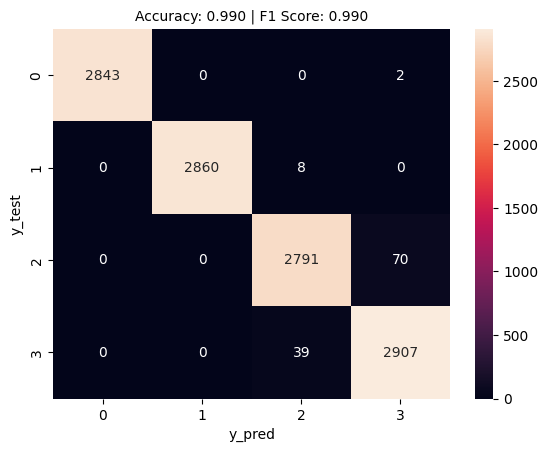

In [ ]:
plot_confusion_matrix(y_test_over, predictions_linear)

# SVM RBF Model



In [ ]:
svm_param_grid_rbf = {
    'C': [0.1,1,10,100],
    'gamma': [0.01, 0.1, 1, 10]
}

svm_rbf = SVC(kernel= 'rbf',random_state=42)

svm_grid_search_rbf = GridSearchCV(svm_rbf, param_grid = svm_param_grid_rbf, cv=kfold, scoring='accuracy')
%time svm_grid_search_rbf.fit(X_train_under, y_train_under)

print("\n")
print("Best parameters for SVM RBF:", svm_grid_search_rbf.best_params_)

CPU times: user 20.2 s, sys: 29.6 ms, total: 20.2 s
Wall time: 28.9 s


Best parameters for SVM RBF: {'C': 10, 'gamma': 0.01}


In [ ]:
svm_rbf = SVC(kernel= 'rbf',C = 10,gamma=0.01,random_state=42)
%time svm_rbf.fit(X_train_over,y_train_over)

CPU times: user 665 ms, sys: 9.05 ms, total: 674 ms
Wall time: 675 ms


SVC(C=10, gamma=0.01, random_state=42)

In [ ]:
predictions_rbf = svm_rbf.predict(X_test_over)
metrics(y_test_over, predictions_rbf)

Accuracy: 0.9961805555555555 ||  Rounded:  0.996
F1 Score: 0.9961805555555555 ||    Rounded:  0.996
Recall: 0.9961805555555555   ||  Rounded:  0.996
Precision: 0.9961805555555555 ||  Rounded:  0.996


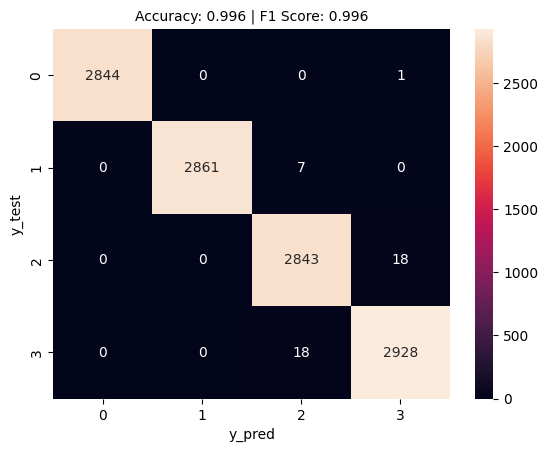

In [ ]:
plot_confusion_matrix(y_test_over, predictions_rbf)

# Random Forest

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
}

n_folds = 5 #5 folds since a lot of params to go through
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(rf_clf, param_grid = rf_param_grid, cv=kfold, scoring='accuracy')
%time rf_grid_search.fit(X_train_under, y_train_under)


print("Best parameters for Random Forest Classifier:", rf_grid_search.best_params_)

CPU times: user 18.1 s, sys: 70.8 ms, total: 18.2 s
Wall time: 18.4 s
Best parameters for Random Forest Classifier: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rf_clf= RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2,n_estimators=100 ,random_state=42)
%time rf_clf.fit(X_train_over,y_train_over)

CPU times: user 3.66 s, sys: 8.72 ms, total: 3.67 s
Wall time: 3.67 s


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
predictions_rf = rf_clf.predict(X_test_over)
metrics(y_test_over, predictions_rf)

Accuracy: 0.9989583333333333 ||  Rounded:  0.999
F1 Score: 0.9989583333333333 ||    Rounded:  0.999
Recall: 0.9989583333333333   ||  Rounded:  0.999
Precision: 0.9989583333333333 ||  Rounded:  0.999


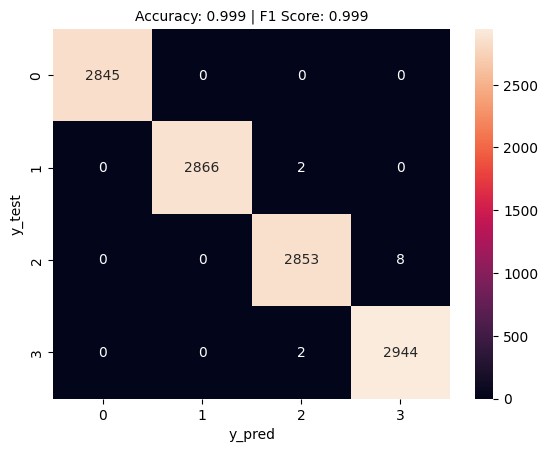

In [ ]:
plot_confusion_matrix(y_test_over, predictions_rf)

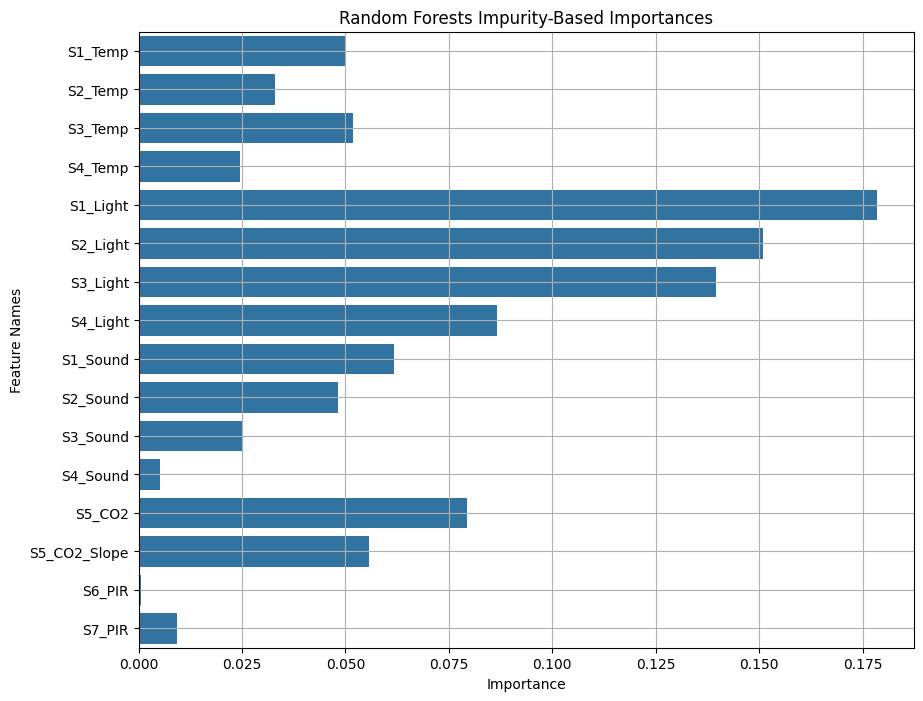

In [ ]:
feature_names = [
    'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
    'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'
]

importances = rf_clf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
sns.color_palette("spring")

plt.figure(figsize=(10,8));
sns.barplot(x=forest_importances, y=feature_names);
plt.grid(True);
plt.title('Random Forests Impurity-Based Importances');
plt.ylabel('Feature Names');
plt.xlabel('Importance')
plt.show()

# Gradient Boost

In [ ]:
grad_param_grid = {
    'learning_rate': [0.1,0.5, 1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'max_features': [1.0, 'sqrt', 'log2']
}

grad_model = GradientBoostingClassifier(random_state=42)

grad_grid_search = GridSearchCV(grad_model, param_grid=grad_param_grid, cv=kfold, scoring='accuracy')
%time grad_grid_search.fit(X_train_under, y_train_under)

print("\nBest parameters for GradientBoostingClassifier:", grad_grid_search.best_params_)

CPU times: user 5min 5s, sys: 667 ms, total: 5min 6s
Wall time: 5min 27s

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.5, 'max_depth': 5, 'max_features': 1.0, 'n_estimators': 50, 'subsample': 1.0}


In [ ]:
grad_model= GradientBoostingClassifier(learning_rate= 0.5, max_depth=5, max_features=1.0, n_estimators=50 , subsample=1.0 , random_state=42)
%time grad_model.fit(X_train_over,y_train_over)

CPU times: user 30.9 s, sys: 37.8 ms, total: 30.9 s
Wall time: 31.1 s


GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=1.0,
                           n_estimators=50, random_state=42)

In [ ]:
predictions_grad =grad_model.predict(X_test_over)
metrics(y_test_over, predictions_grad)

Accuracy: 0.9998263888888889 ||  Rounded:  1.0
F1 Score: 0.9998263888888889 ||    Rounded:  1.0
Recall: 0.9998263888888889   ||  Rounded:  1.0
Precision: 0.9998263888888889 ||  Rounded:  1.0


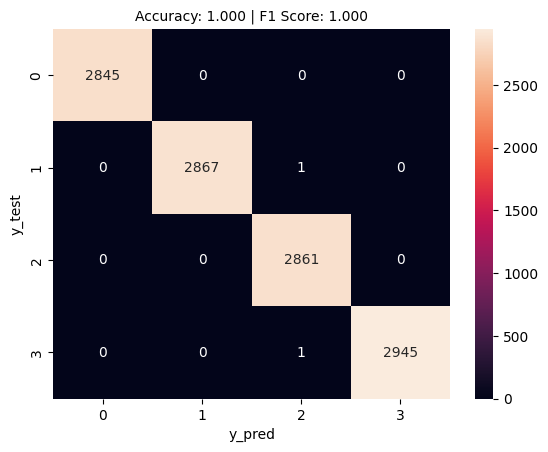

In [ ]:
plot_confusion_matrix(y_test_over, predictions_grad)

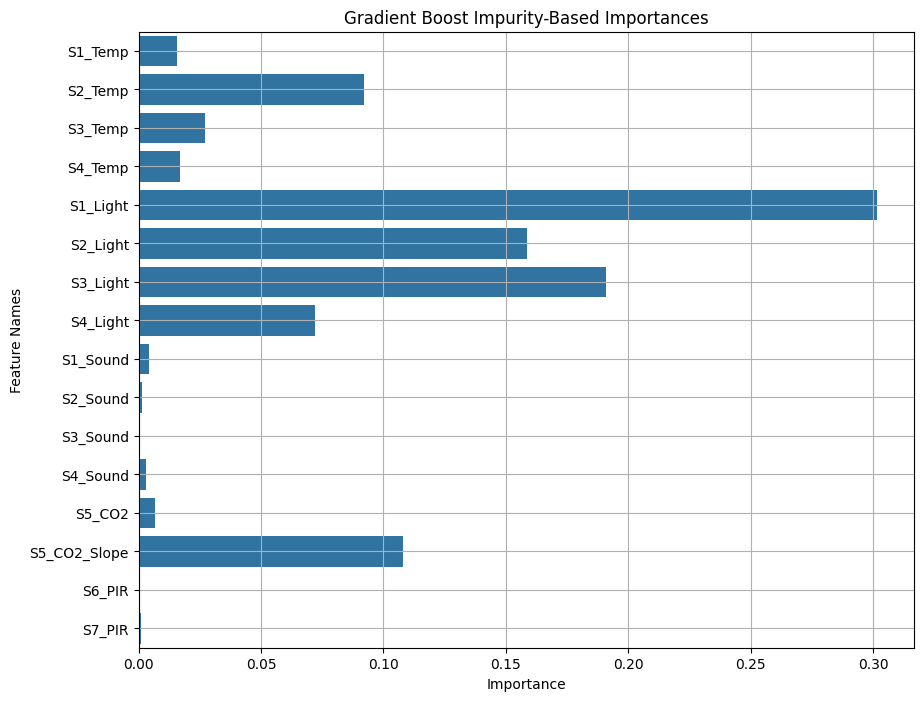

In [ ]:
importances = grad_model.feature_importances_
boost1_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10,8));
sns.barplot(x=boost1_importances, y=feature_names);
plt.grid(True);
plt.title('Gradient Boost Impurity-Based Importances');
plt.ylabel('Feature Names');
plt.xlabel('Importance')
plt.show()

# XGBoost

In [ ]:
xgb_param_grid = {
    'learning_rate': [0.1,0.5, 1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 5]
}


xgb_model = XGBClassifier(reg_lambda=1.0, reg_alpha=0.0, use_label_encoder=False, eval_metric='logloss', random_state=42)


xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=kfold, scoring='accuracy')
%time xgb_grid_search.fit(X_train_under, y_train_under)


print("Best parameters for XGBClassifier:", xgb_grid_search.best_params_)
print("\n")

CPU times: user 48.5 s, sys: 794 ms, total: 49.3 s
Wall time: 28.2 s
Best parameters for XGBClassifier: {'learning_rate': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}




In [ ]:
xgb_model= XGBClassifier(learning_rate = 1, min_child_weight =  1, max_depth= 3, n_estimators= 50, subsample= 0.8 ,reg_lambda=1.0, reg_alpha=0.0, use_label_encoder=False, eval_metric='logloss',random_state=42)
%time xgb_model.fit(X_train_over,y_train_over)

CPU times: user 931 ms, sys: 5.98 ms, total: 937 ms
Wall time: 502 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
predictions_xgb = xgb_model.predict(X_test_over)
metrics(y_test_over, predictions_xgb)

Accuracy: 0.9996527777777777 ||  Rounded:  1.0
F1 Score: 0.9996527777777777 ||    Rounded:  1.0
Recall: 0.9996527777777777   ||  Rounded:  1.0
Precision: 0.9996527777777777 ||  Rounded:  1.0


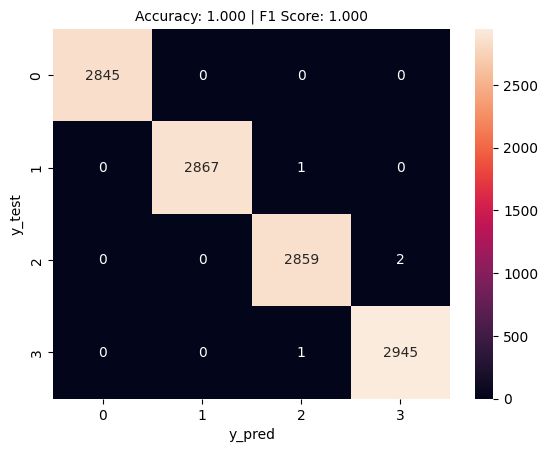

In [ ]:
plot_confusion_matrix(y_test_over, predictions_xgb)

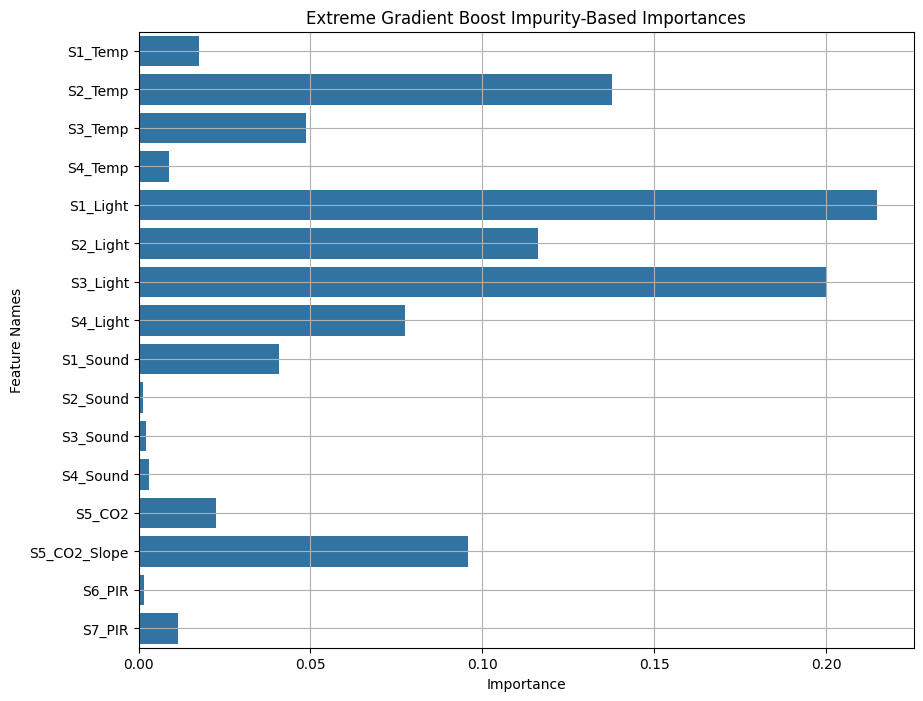

In [ ]:
importances = xgb_model.feature_importances_
boost2_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10,8));
sns.barplot(x=boost2_importances, y=feature_names);
plt.grid(True);
plt.title('Extreme Gradient Boost Impurity-Based Importances');
plt.ylabel('Feature Names');
plt.xlabel('Importance');
plt.show()

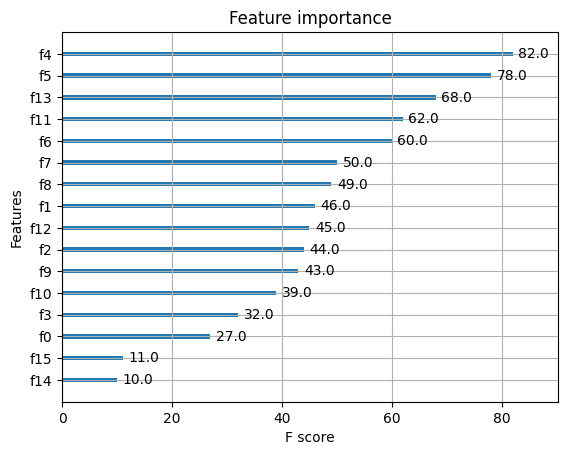

In [ ]:
from xgboost import plot_importance


# from the XGB lib by default it plots based on information gain
plot_importance(xgb_model)
plt.show()
from xgboost import plot_tree

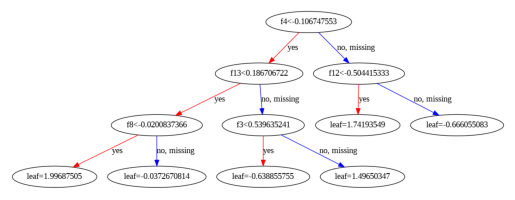

In [ ]:
from xgboost import plot_tree
plot_tree(xgb_model)
plt.show()